In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib

In [2]:
df_p1_val = pd.read_pickle("data/validation_dataset_p1.pkl")
df_p4_val = pd.read_pickle("data/validation_dataset_p4.pkl")

df_p1_val = df_p1_val[:400]
df_p4_val = df_p4_val[:400]

In [3]:
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=1):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y


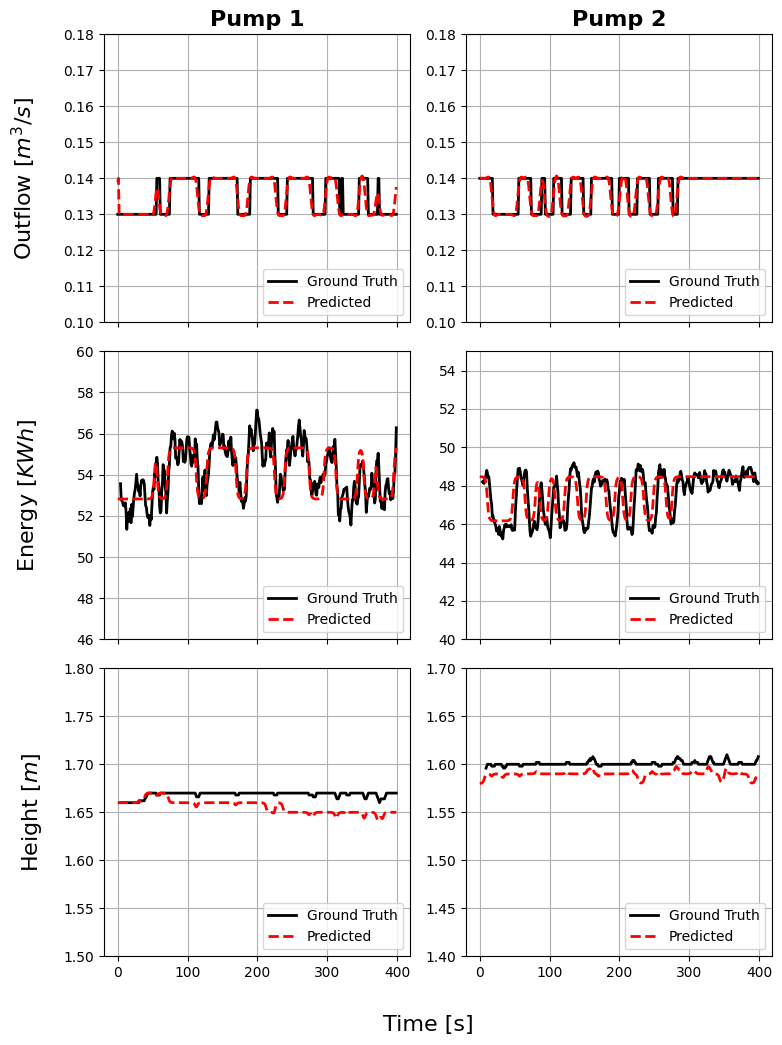

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(8, 10), sharex=True, sharey=False)  # Set the plot to have 3 rows and 2 columns
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
matplotlib.rc('pdf', fonttype=42)
# Pump 1
# First plot
axs[0, 0].plot(df_p1_val["outflow"], linewidth=2, color="black", label='Ground Truth')
axs[0, 0].plot(np.roll(butter_lowpass_filter(df_p1_val["outflow_opt"], cutoff=.1, fs=1, order=2),2), linewidth=2, linestyle="dashed", color="red", label='Predicted')
axs[0, 0].grid()
axs[0, 0].set_ylim(0.10, 0.18)
axs[0, 0].set_ylabel('Outflow [$m^3/s$]', fontsize=16, labelpad=18)
axs[0, 0].legend(loc='lower right', fontsize=10)
#mean_percentage_error_outflow = mean_absolute_percentage_error(df_p1_val["outflow"], df_p1_val["outflow_opt"])
axs[0, 0].set_title(f'Pump 1', fontsize=16, fontweight='bold')

# Second plot
axs[1, 0].plot(df_p1_val["pump1_power"].rolling(5).mean(), linewidth=2, color="black", label='Ground Truth')
axs[1, 0].plot(butter_lowpass_filter(df_p1_val["pump1_power_opt"]-1, cutoff=.1, fs=1, order=1), linewidth=2, linestyle="dashed", color="red", label='Predicted')
axs[1, 0].grid()
axs[1, 0].set_ylim(46, 60)
axs[1, 0].set_ylabel('Energy [$KWh$]', fontsize=16, labelpad=26)
axs[1, 0].legend(loc='lower right', fontsize=10)
#mean_percentage_error_power = mean_absolute_percentage_error(df_p1_val["pump1_power"], df_p1_val["pump1_power_opt"])
#axs[1, 0].set_title(f'MAPE: {mean_percentage_error_power:.2f}%', fontsize=16, fontweight='bold')

# Third plot
axs[2, 0].plot(df_p1_val["height"].rolling(5).mean(), linewidth=2, color="black", label='Ground Truth')
axs[2, 0].plot(butter_lowpass_filter(df_p1_val["height_opt"], cutoff=.1, fs=1, order=1), linewidth=2, color="red", linestyle="dashed", label='Predicted')
axs[2, 0].grid()
axs[2, 0].set_ylim(1.5, 1.8)
#axs[2, 0].set_xlabel('Time (s)', fontsize=16, fontweight='bold')
axs[2, 0].set_ylabel('Height [$m$]', fontsize=16, labelpad=14)
axs[2, 0].legend(loc='lower right', fontsize=10)
#mean_percentage_error_height = mean_absolute_percentage_error(df_p1_val["height"], df_p1_val["height_opt"])
#axs[2, 0].set_title(f'MAPE: {mean_percentage_error_height:.2f}%', fontsize=16, fontweight='bold')

# Pump 4
# First plot
axs[0, 1].plot(df_p4_val["outflow"], linewidth=2, color="black", label='Ground Truth')
axs[0, 1].plot(np.roll(butter_lowpass_filter(df_p4_val["outflow_opt"], cutoff=.1, fs=1, order=2),4), linewidth=2, linestyle="dashed", color="red", label='Predicted')
axs[0, 1].grid()
axs[0, 1].set_ylim(0.10, 0.18)
#axs[0, 1].set_ylabel('Outflow ($m^3/s$)', fontsize=16, fontweight='bold')
axs[0, 1].legend(loc='lower right', fontsize=10)
#mean_percentage_error_outflow = mean_absolute_percentage_error(df_p4_val["outflow"], df_p4_val["outflow_opt"])
axs[0, 1].set_title(f'Pump 2', fontsize=16, fontweight='bold')

# Second plot
axs[1, 1].plot(df_p4_val["pump4_power"].rolling(5).mean(), linewidth=2, color="black", label='Ground Truth')
axs[1, 1].plot(butter_lowpass_filter(df_p4_val["pump4_power_opt"], cutoff=.1, fs=1, order=1)[3:], linewidth=2, linestyle="dashed", color="red", label='Predicted')
axs[1, 1].grid()
axs[1, 1].set_ylim(40, 55)
#axs[1, 1].set_ylabel('Power ($KW/h$)', fontsize=16, fontweight='bold')
axs[1, 1].legend(loc='lower right', fontsize=10)
#mean_percentage_error_power = mean_absolute_percentage_error(df_p4_val["pump4_power"], df_p4_val["pump4_power_opt"])
#axs[1, 1].set_title(f'MAPE: {mean_percentage_error_power:.2f}%', fontsize=16, fontweight='bold')

# Third plot
axs[2, 1].plot(df_p4_val["height"][5:1000].rolling(5).mean(), linewidth=2, color="black", label='Ground Truth')
axs[2, 1].plot(butter_lowpass_filter(df_p4_val["height_opt"], cutoff=.1, fs=1, order=1), linewidth=2, color="red", linestyle="dashed", label='Predicted')
axs[2, 1].grid()
axs[2, 1].set_ylim(1.4, 1.7)
#axs[2, 1].set_xlabel('Time (s)', fontsize=16)
#axs[2, 1].set_ylabel('Height ($m$)', fontsize=16, fontweight='bold')
axs[2, 1].legend(loc='lower right', fontsize=10)
#mean_percentage_error_height = mean_absolute_percentage_error(df_p4_val["height"], df_p4_val["height_opt"])
#axs[2, 1].set_title(f'MAPE: {mean_percentage_error_height:.2f}%', fontsize=16, fontweight='bold')

fig.text(0.55, -0.03, 'Time [s]', ha='center', va='center', fontsize=16)

plt.tight_layout()
plt.savefig('img/dt_validation.pdf', dpi=300, bbox_inches='tight') 
plt.savefig('img/dt_validation.svg', format='svg', dpi=300, bbox_inches='tight')  # Save the plot to a single file
plt.show()
